# Ocean eddy tracking ACCESS-OM2 0.25

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Import SSHa satellite.
path="/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_ryf8485_KDS50/output075/ocean/"
ncfile=Dataset(path+'ocean_daily.nc')
ssha=squeeze(ncfile.variables['sea_level'][0:30,:,:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean'][:]
lat=ncfile.variables['yt_ocean'][:]

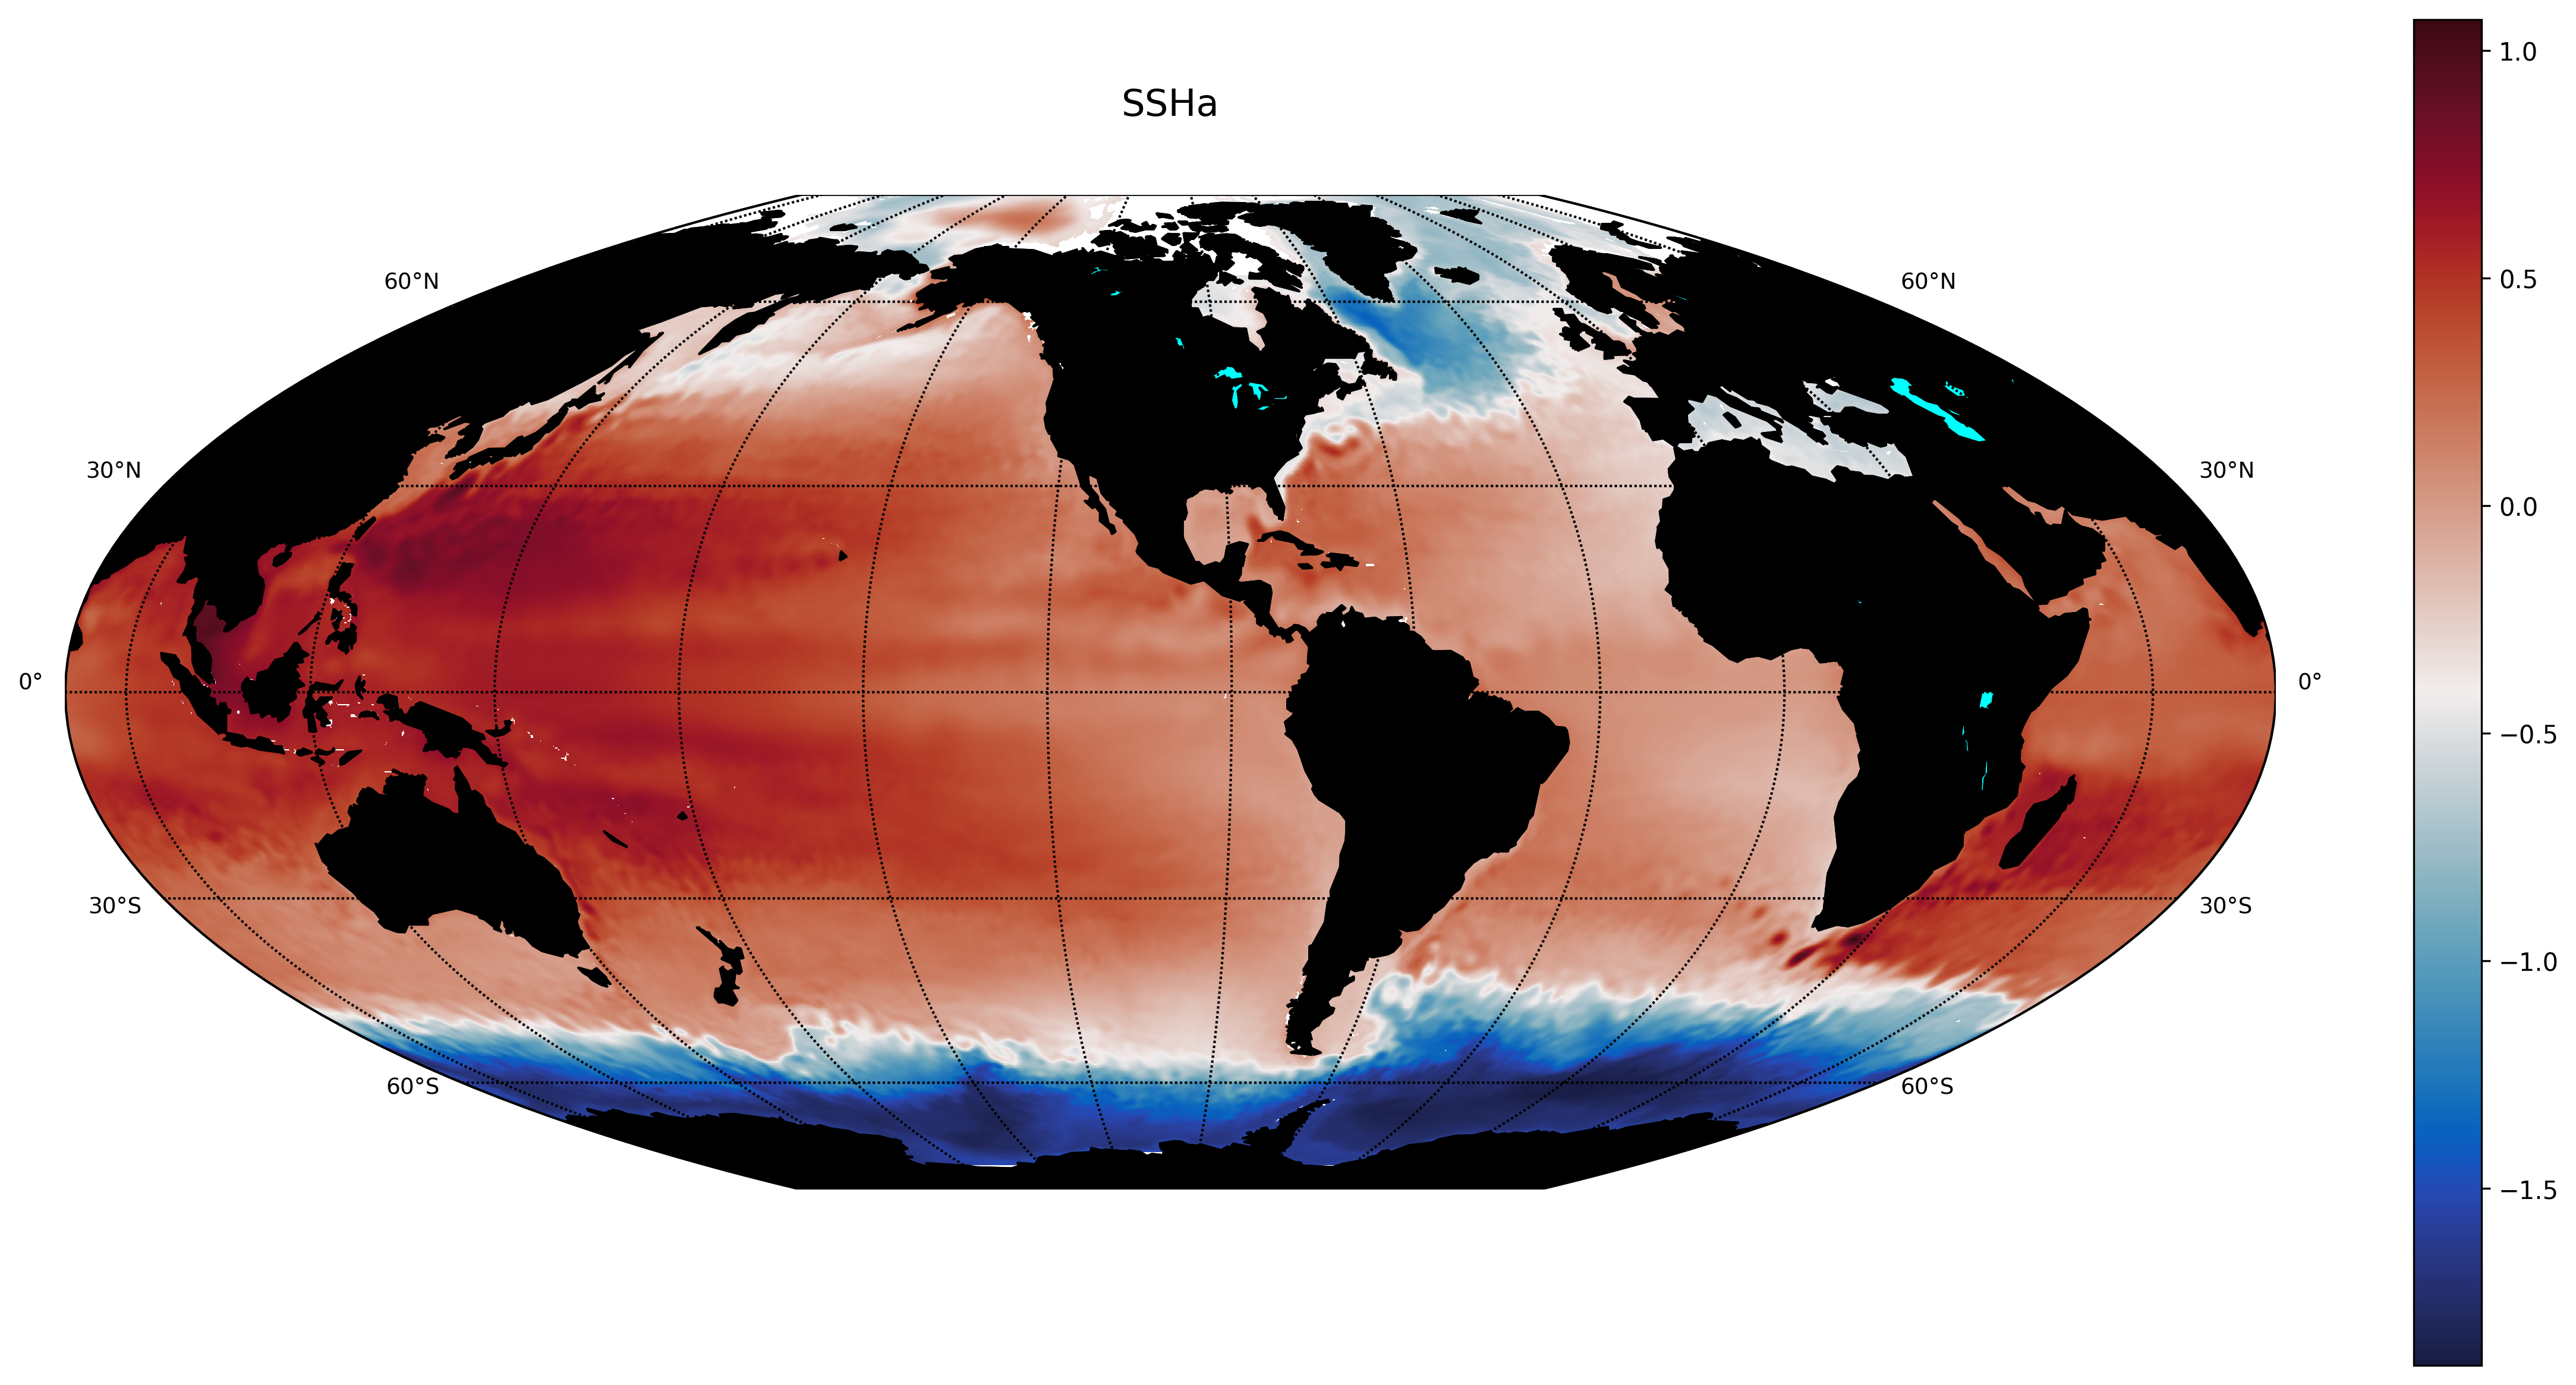

In [3]:
basemap_mplot(lon,lat,ssha[0,:,:],title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-100,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(20,10),fontsize=15)
colorbar()

(<matplotlib.figure.Figure at 0x7f37c42a74a8>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f376eb2e9b0>,
       dtype=object))

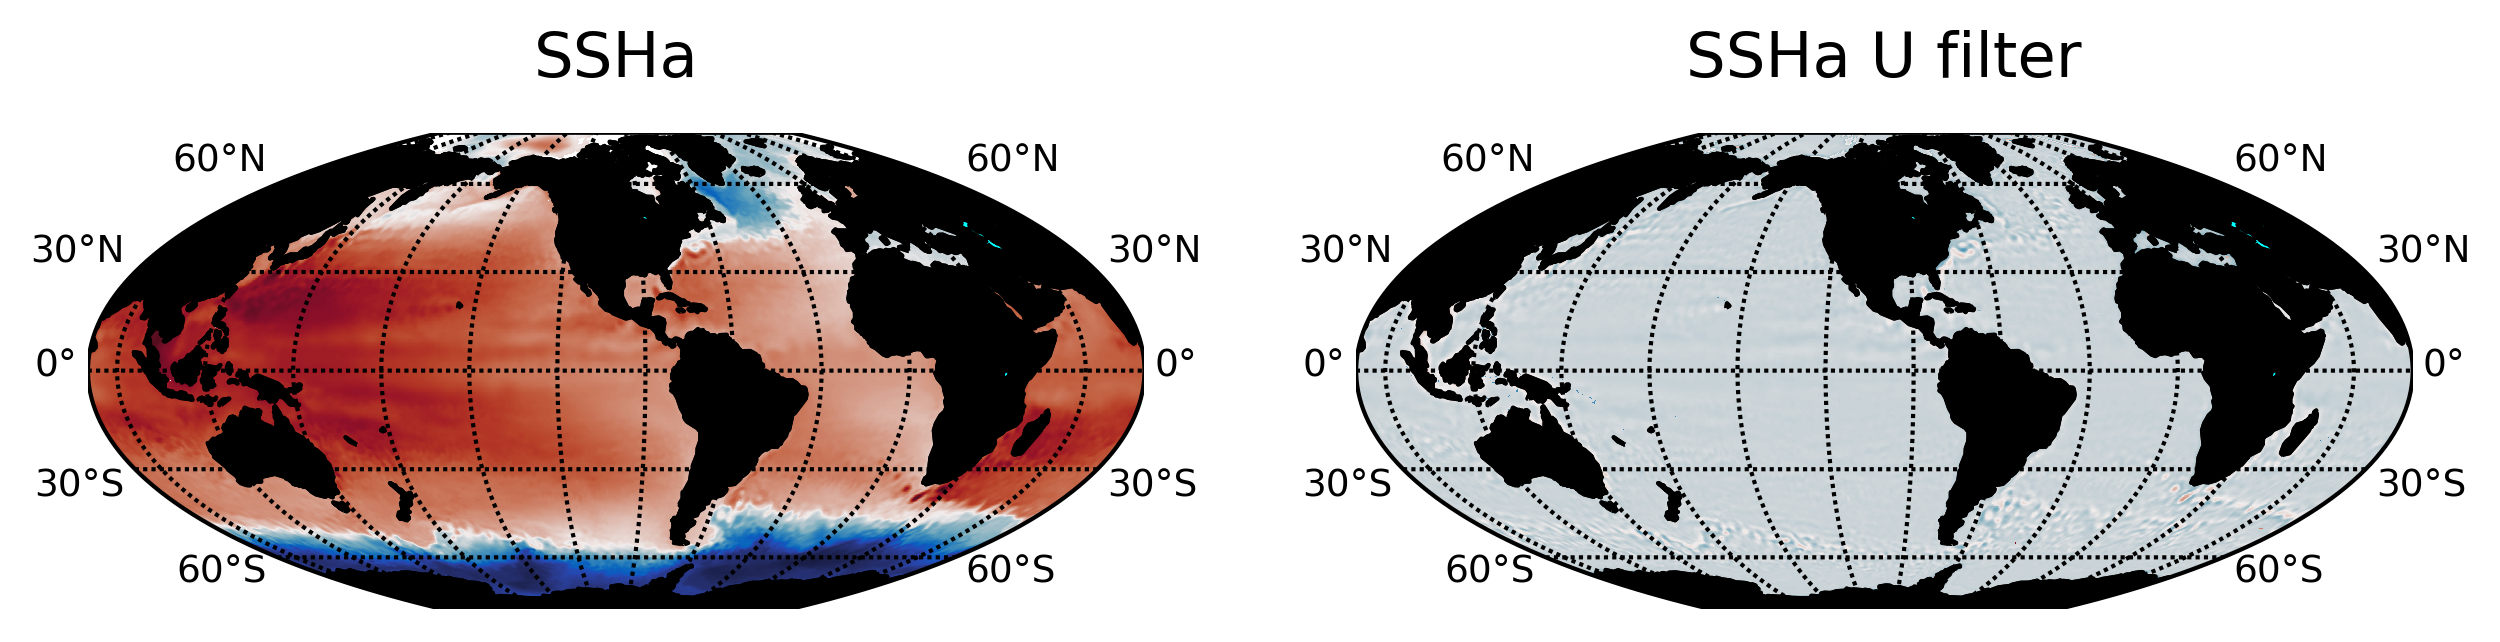

In [4]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.

#500:1500,0:300

nofilterdata=ssha[0,:,:]
nofilterdata=nofilterdata.filled(fill_value=0)
nofilterdata = nofilterdata - ndimage.uniform_filter(nofilterdata, size=20)

#data = ma.masked_array(nofilterdata, mask)
basemap_mplot(lon,lat,[ssha[0,:,:],nofilterdata],title=["SSHa","SSHa U filter"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-100,scale='Lin',cmap=cm.cm.balance\
              ,vmin='',vmax='',xan=2,yan=1,figsize=(10,5),fontsize=15,dpi=300)

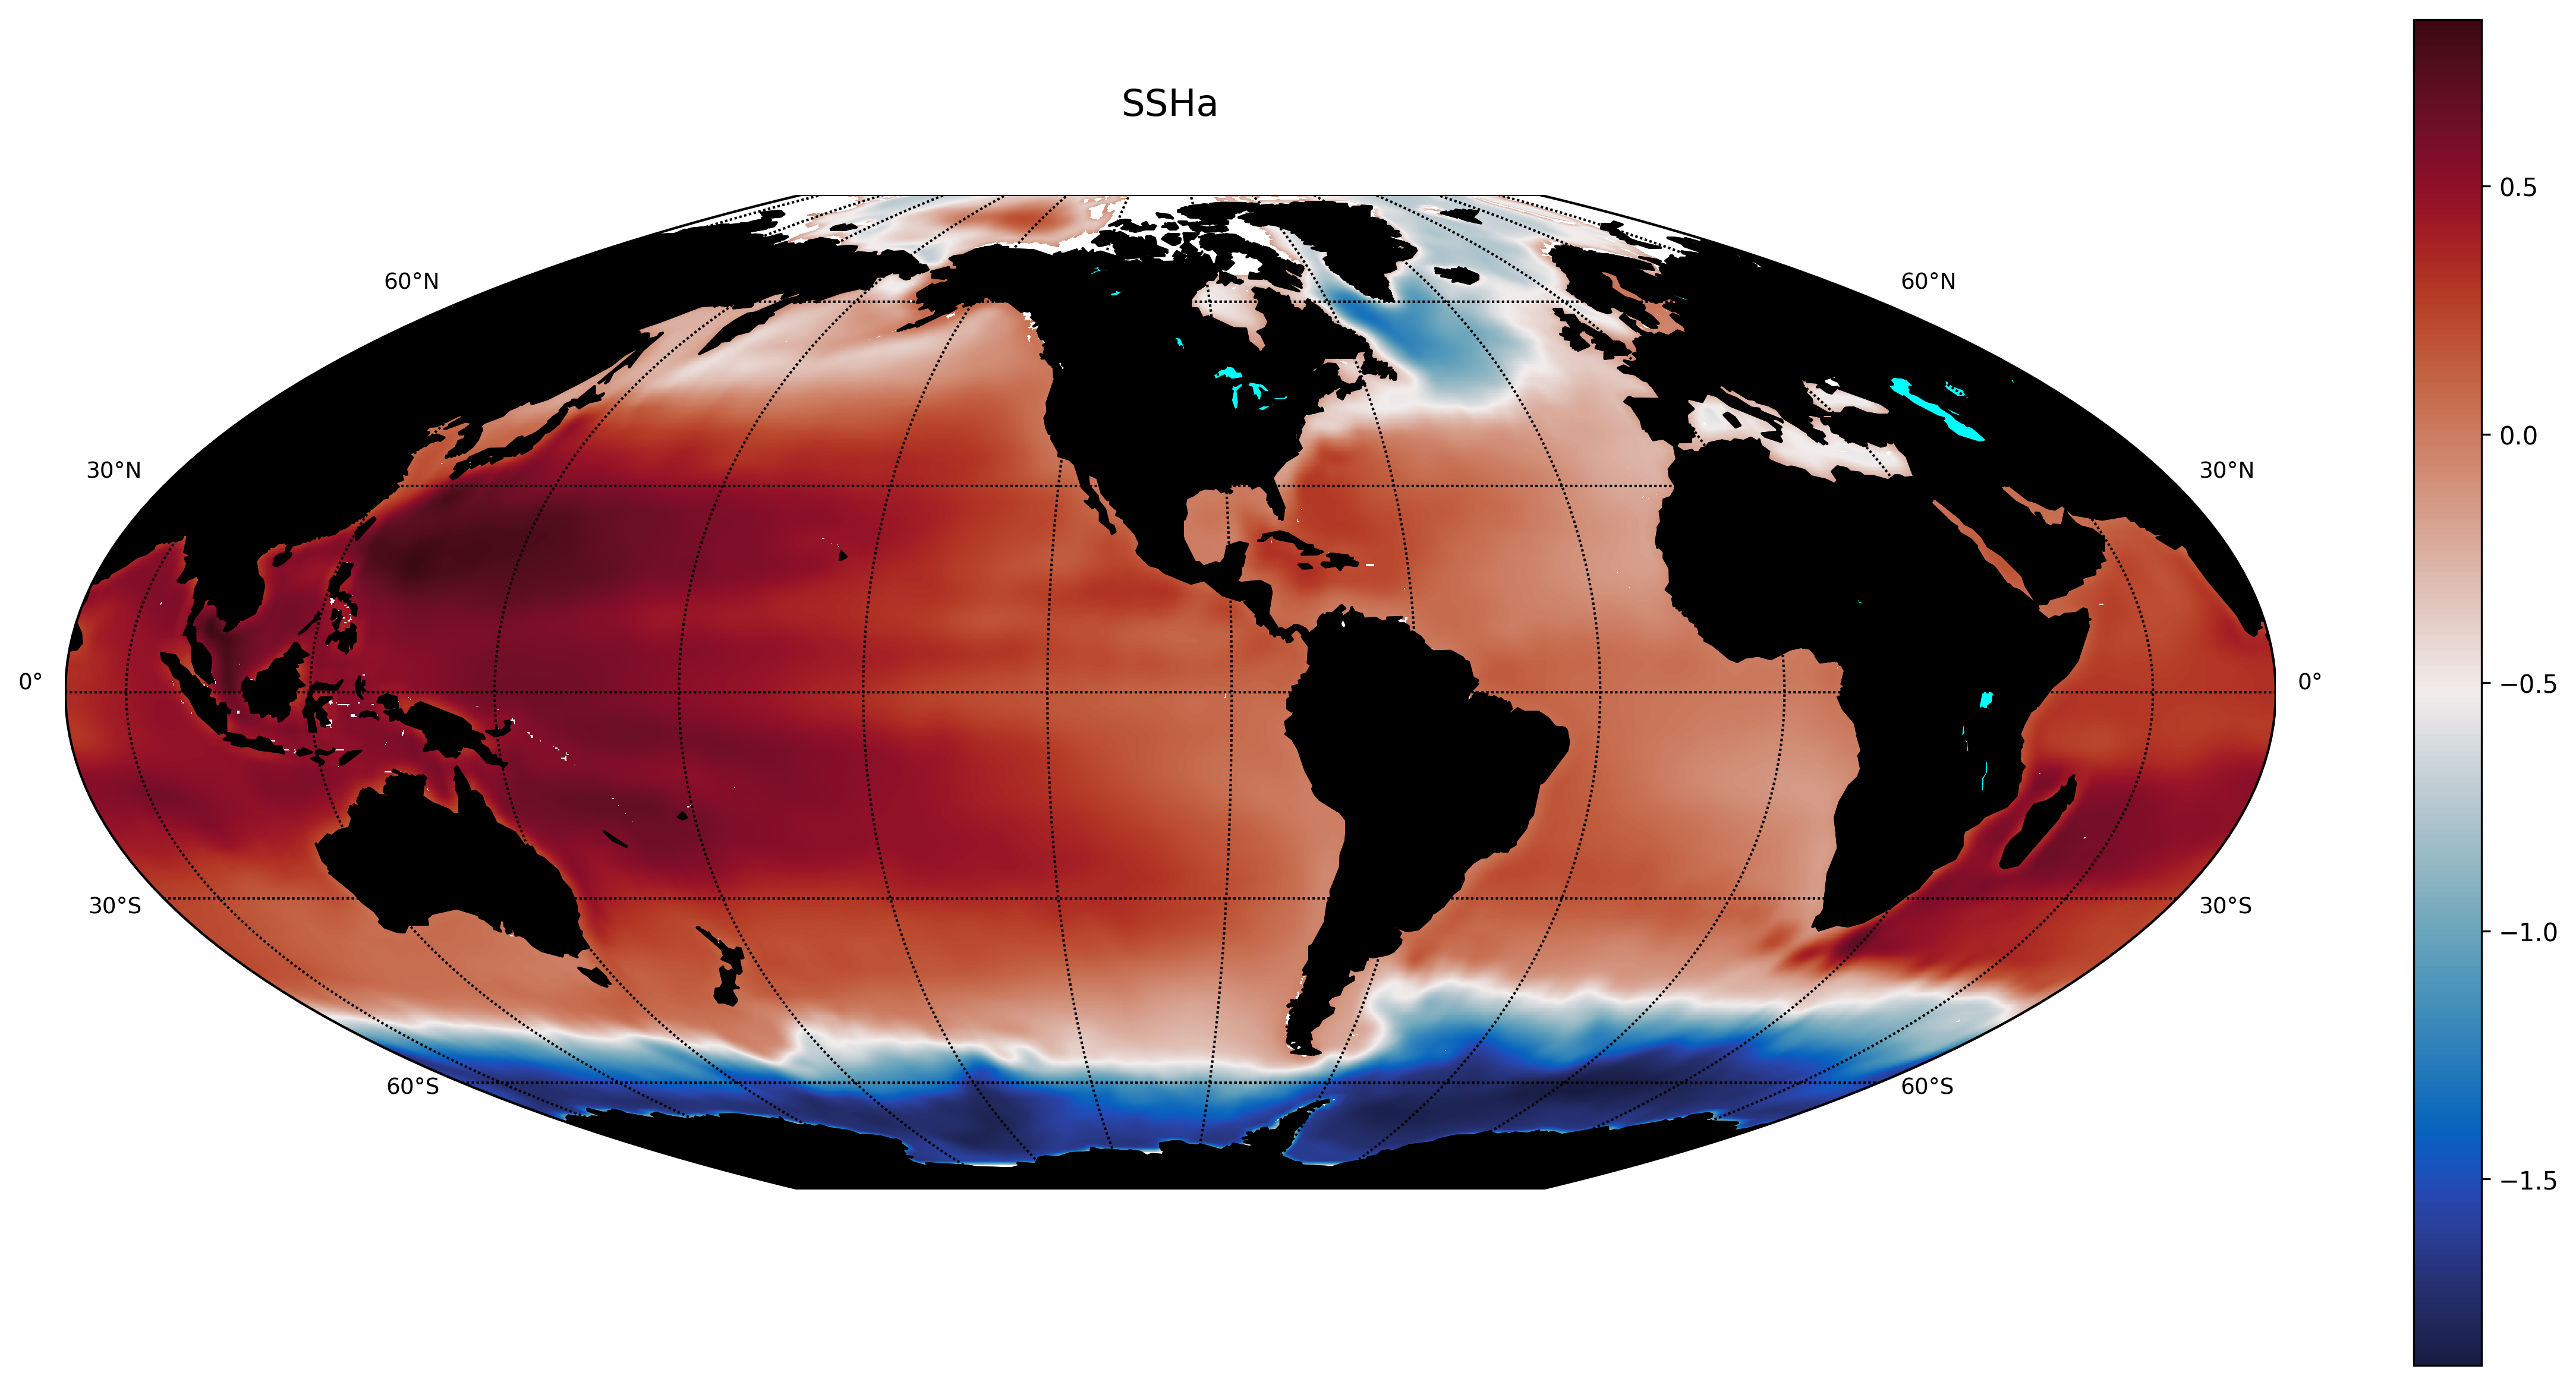

In [5]:
basemap_mplot(lon,lat,ssha[0,:,:]-nofilterdata,title="SSHa",projection='mbtfpq',lat_0=-90,lon_0=-100,\
              resolution='c',scale='Lin',vmin='',vmax='',cmap=cm.cm.balance,xan=1,yan=1,\
              figsize=(20,10),fontsize=15)
colorbar()

In [6]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,int(len(lon))],[0,int(len(lat))]])

In [7]:
eddytd=analyseddyzt(ssha[:,:,:],lon,lat,0,1,1,0.8,0.01,0.01,data_meant='',areamap=areamap,mask=''\
                     #,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                     ,maskopt='contour',sfilter='uniform',sfsize=30\
                     ,destdir='',physics='',diagnostics=False,plotdata=False,pprint=False)

 0% [>]100% Time Elapsed: 260 s  Number of contours analysed: 879 


In [8]:
eddysplot=reconstruct_syntetic(shape(ssha),lon,lat,eddytd)

IndexError: invalid index to scalar variable.

In [ ]:
eddytdn=analyseddyzt(ssha[:,:,:],lon,lat,0,1,1,-0.8,-0.01,-0.01,data_meant='',areamap=areamap,mask=''\
                     ,eccenfit=0.95,gaussrsquarefit=0.8,ellipsrsquarefit=0.85\
                     ,maskopt='contour',sfilter='uniform',sfsize=30\
                     ,destdir='',physics='',diagnostics=False,pprint=False)

In [ ]:
eddysplotn=reconstruct_syntetic(shape(ssha),lon,lat,eddytdn)

In [ ]:
basemap_mplot(lon,lat,[ssha[0,:,:],ssha[0,:,:]-eddysplot[0,:,:]-eddysplotn[0,:,:],eddysplotn[0,:,:],eddysplot[0,:,:]]\
              ,title=["SSHa","Eddies extraction","Negative Eddies extraction","Positive Eddies extraction"]\
              ,projection='mbtfpq',lat_0=-90,lon_0=-100,scale='Lin',cmap=cm.cm.balance,\
              vmin=-.40,vmax=.40,xan=2,yan=2,figsize=(20,10),fontsize=20);

In [ ]:
mask=ma.getmask(ssha[0,:,:])

In [ ]:
u_g,v_g=geovelfield(ssha[0,:,:],lon,lat,mask,5)
plt.pcolormesh(u_g,vmin=0,vmax=0.1)
print(nanmax(u_g),nanmax(v_g))

In [ ]:
eddyu,eddyv=geovelfield(eddysplotn[0,:,:]+eddysplot[0,:,:],lon,lat,mask,5)

In [ ]:
ke=KE(u_g,v_g)
eke=KE(eddyu,eddyv)
bjke=ke-eke#KE(u_g-eddyu,v_g-eddyv)

print(mean(ke),mean(bjke),mean(eke))

In [ ]:
basemap_mplot(lon,lat,[ke,bjke,eke]\
              ,title=["KE","B&J KE","EKE"],scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-100,vmin=0,vmax=0.2,xan=3,yan=1,figsize=(20,30),fontsize=20);

In [ ]:
print(mean(ke))
print(mean(bjke))
print(mean(eke))

In [ ]:
basemap_mplot(lon,lat,ke-eke\
              ,title="BKE",scale='Lin',cmap=cm.cm.tempo,\
              projection='mbtfpq',lat_0=-90,lon_0=-100,vmin=0,vmax=0.2,xan=1,yan=1,figsize=(20,10),fontsize=20);
colorbar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')
############################
#Create the figure

fig = plt.figure(figsize=(15, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
#############################
#Plot the background and other things, This will be in all the frames
map = Basemap(projection='mbtfpq',lat_0=-90,lon_0=-180,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()
quad1 = ax1.pcolormesh(lonm,latm,eke[0,:,:],shading='gouraud',cmap=cm.cm.tempo,\
              vmin=0,vmax=0.2)
cb1 = fig.colorbar(quad1,ax=ax1)
##############################

##############################
#Intitial stage blank
def init():
    quad1.set_array([])
    return quad1
##############################

##############################
#Animation function, replace the values of the eke in a '1d list'
def animate(iter):
    quad1.set_array(eke[iter,:,:].ravel())
    return quad1
##############################

##############################
#Remove edges
gs.tight_layout(fig)
##############################

##############################
#Animation structure
anim2 = animation.FuncAnimation(fig,animate,frames=30,interval=1000,blit=False,repeat=False)
##############################
plt.close()
##############################
#Display and convert animation to html5
anim2



In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# #Save animation
anim2.save('../output/eke_30days_ecc0-08_1axis.mp4', writer=writer)